## Import Libraries 

In [198]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [199]:
data = pd.read_csv('dataset/Dataset of Diabetes .csv')
data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


## Data Exploration & Perprocessing

In [200]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000.0,340.500000,2.403977e+02,1.0,125.75,300.5,550.25,800.00
No_Pation,1000.0,270551.408000,3.380758e+06,123.0,24063.75,34395.5,45384.25,75435657.00
AGE,1000.0,53.528000,8.799241e+00,20.0,51.00,55.0,59.00,79.00
Urea,1000.0,5.124743,2.935165e+00,0.5,3.70,4.6,5.70,38.90
Cr,1000.0,68.943000,5.998475e+01,6.0,48.00,60.0,73.00,800.00
HbA1c,1000.0,8.281160,2.534003e+00,0.9,6.50,8.0,10.20,16.00
Chol,1000.0,4.862820,1.301738e+00,0.0,4.00,4.8,5.60,10.30
TG,1000.0,2.349610,1.401176e+00,0.3,1.50,2.0,2.90,13.80
HDL,1000.0,1.204750,6.604136e-01,0.2,0.90,1.1,1.30,9.90
LDL,1000.0,2.609790,1.115102e+00,0.3,1.80,2.5,3.30,9.90


In [201]:
data.describe(include='O').T

,count,unique,top,freq
Gender,1000,3,M,565
CLASS,1000,5,Y,840


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [203]:
data['CLASS'].value_counts()

Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

- As we see here there are repeated values in the `CLASS` column (as some of them has extra spaces) so we need to remove them.

In [204]:
data['CLASS'].str.strip().value_counts()

Y    844
N    103
P     53
Name: CLASS, dtype: int64

In [205]:
# strip class values
data['CLASS'] = data['CLASS'].str.strip()

In [206]:
data['Gender'].value_counts()

M    565
F    434
f      1
Name: Gender, dtype: int64

- As we see here there are repeated values in the `Gender` column (as there is f and F) so we need to convert them to uppercase.

In [207]:
data['Gender'] = data['Gender'].str.upper()

In [208]:
data['Gender'].value_counts()

M    565
F    435
Name: Gender, dtype: int64

In [209]:
# check for duplicates
data.duplicated().sum()

0

In [30]:
data.duplicated(subset='ID').sum()

200

In [31]:
data.duplicated(subset='No_Pation').sum()

39

In [32]:
data[data.duplicated(subset='ID')].sort_values(by='ID')

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
846,1,34325,M,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
847,2,44835,M,60,2.1,56,7.2,6.3,3.7,1.0,3.7,1.7,28.0,Y
848,3,41248,M,53,4.2,55,8.0,5.0,2.5,1.3,2.3,1.6,30.0,Y
849,4,18642,M,55,9.2,101,8.5,5.6,1.9,1.3,1.2,0.7,28.0,Y
850,5,51477,M,58,5.9,67,9.9,5.2,1.8,0.9,3.6,0.6,29.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,196,454316,M,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,Y
240,197,24037,M,69,5.9,71,10.4,5.4,1.3,1.7,3.1,0.6,33.0,Y
993,198,454316,M,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,Y
994,199,454316,M,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,Y


# Visualization

- visualize the distribution of numerical columns

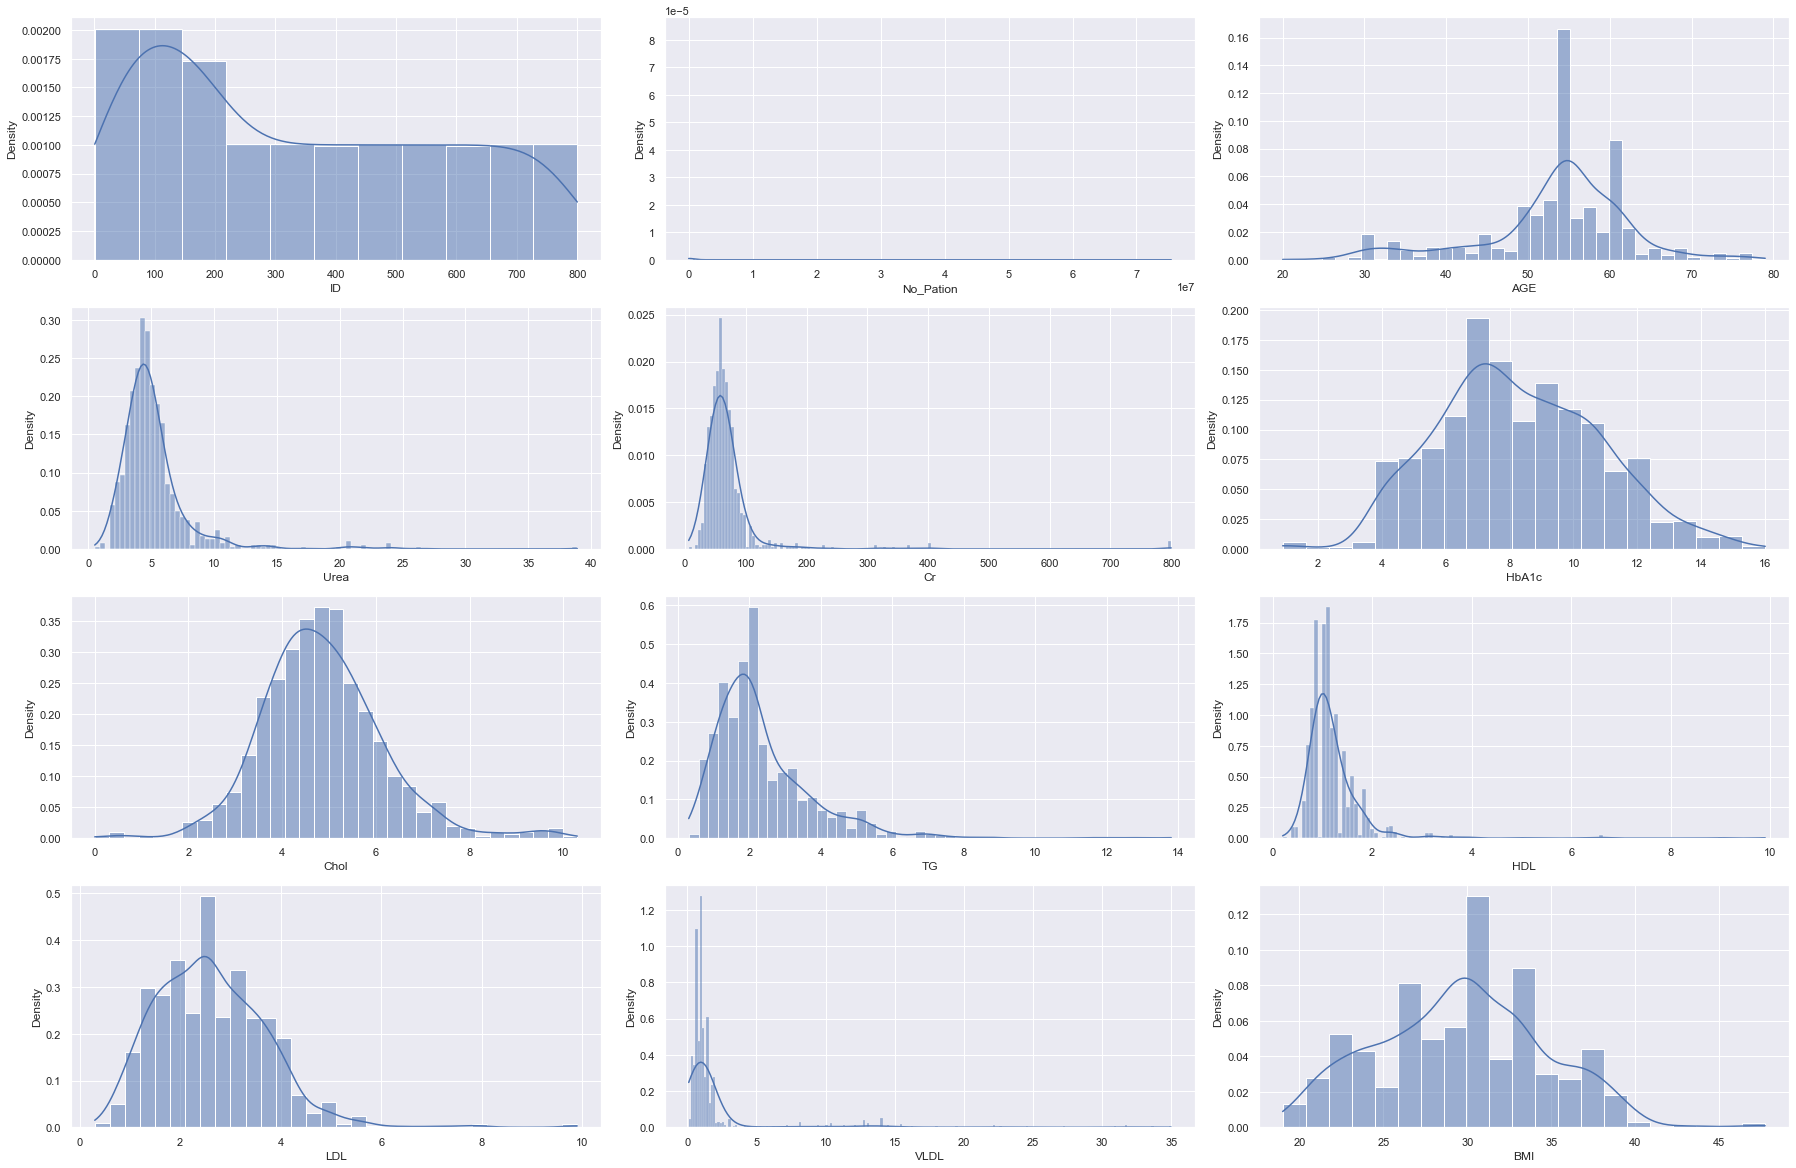

In [33]:
cols = data.select_dtypes(exclude='object').columns.to_list()
fig = plt.figure(figsize=(25, 40))
for i, col in enumerate(cols):
    plt.subplot(10, 3, i+1)
    sns.histplot(data[col], kde=True, stat='density')
fig.tight_layout(pad=1)

- As we see some columns are skewed

## Pair plot

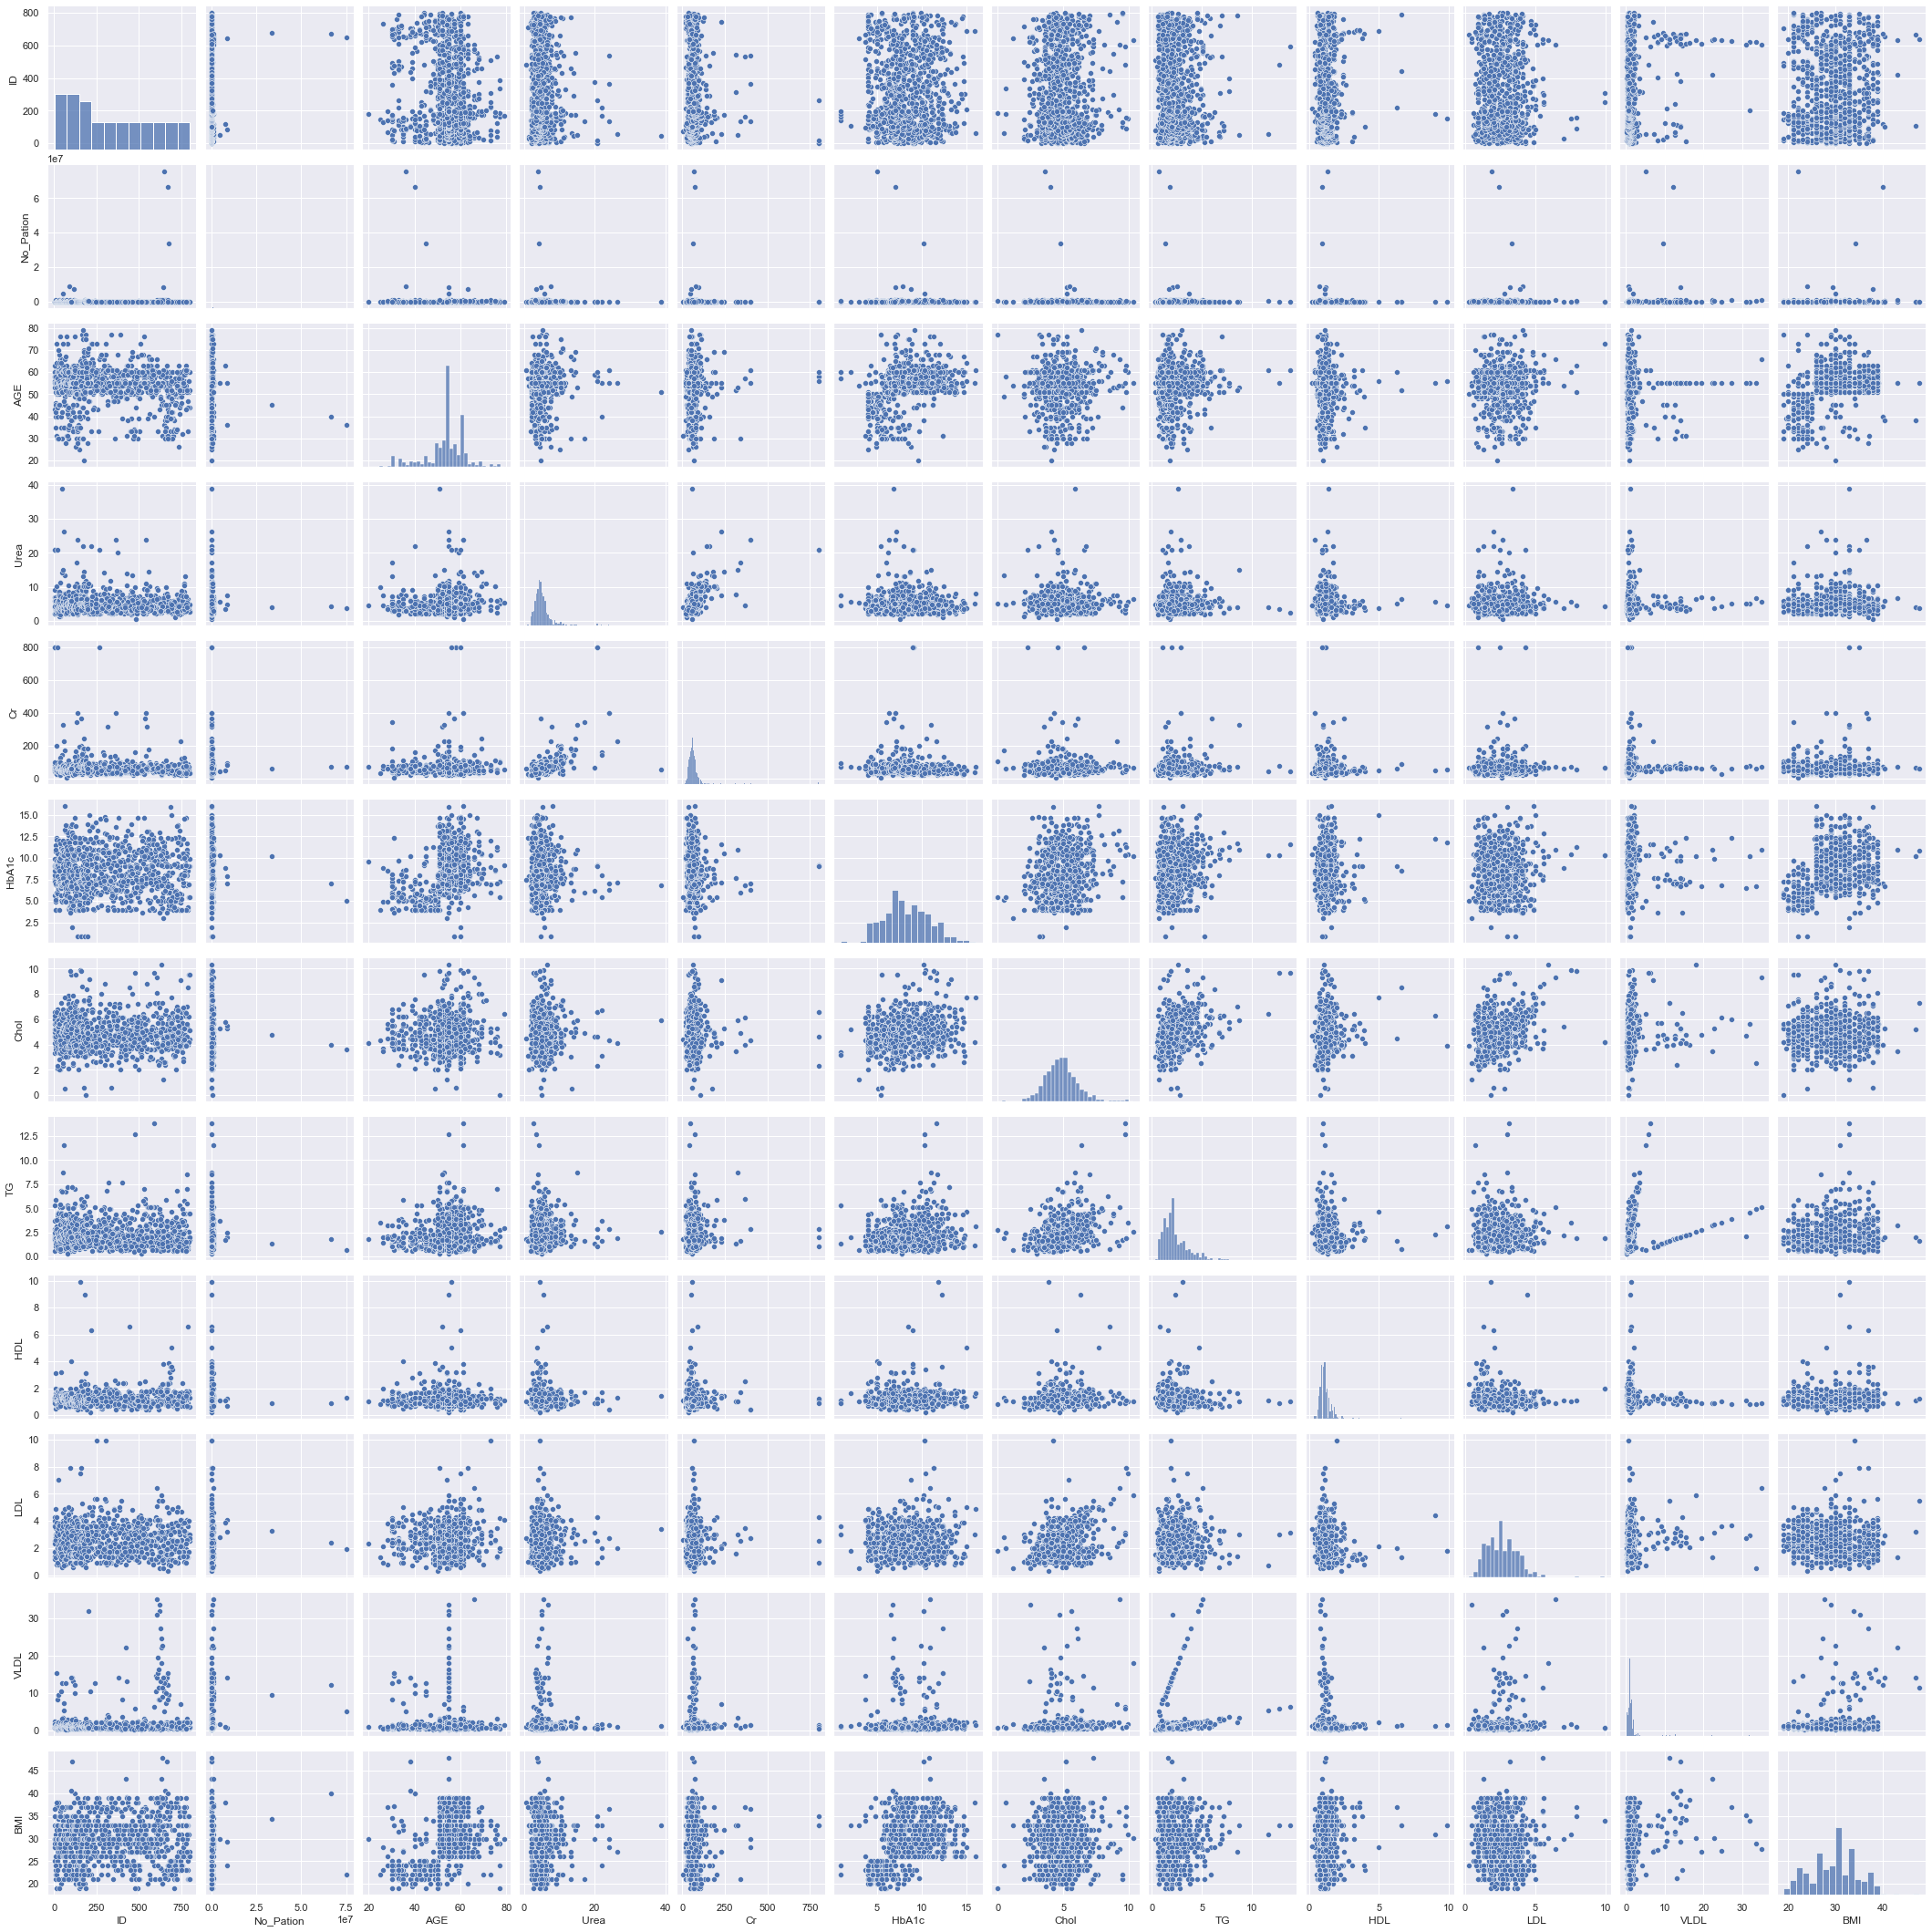

In [34]:
sns.pairplot(data= data)
plt.show()

## Box plot

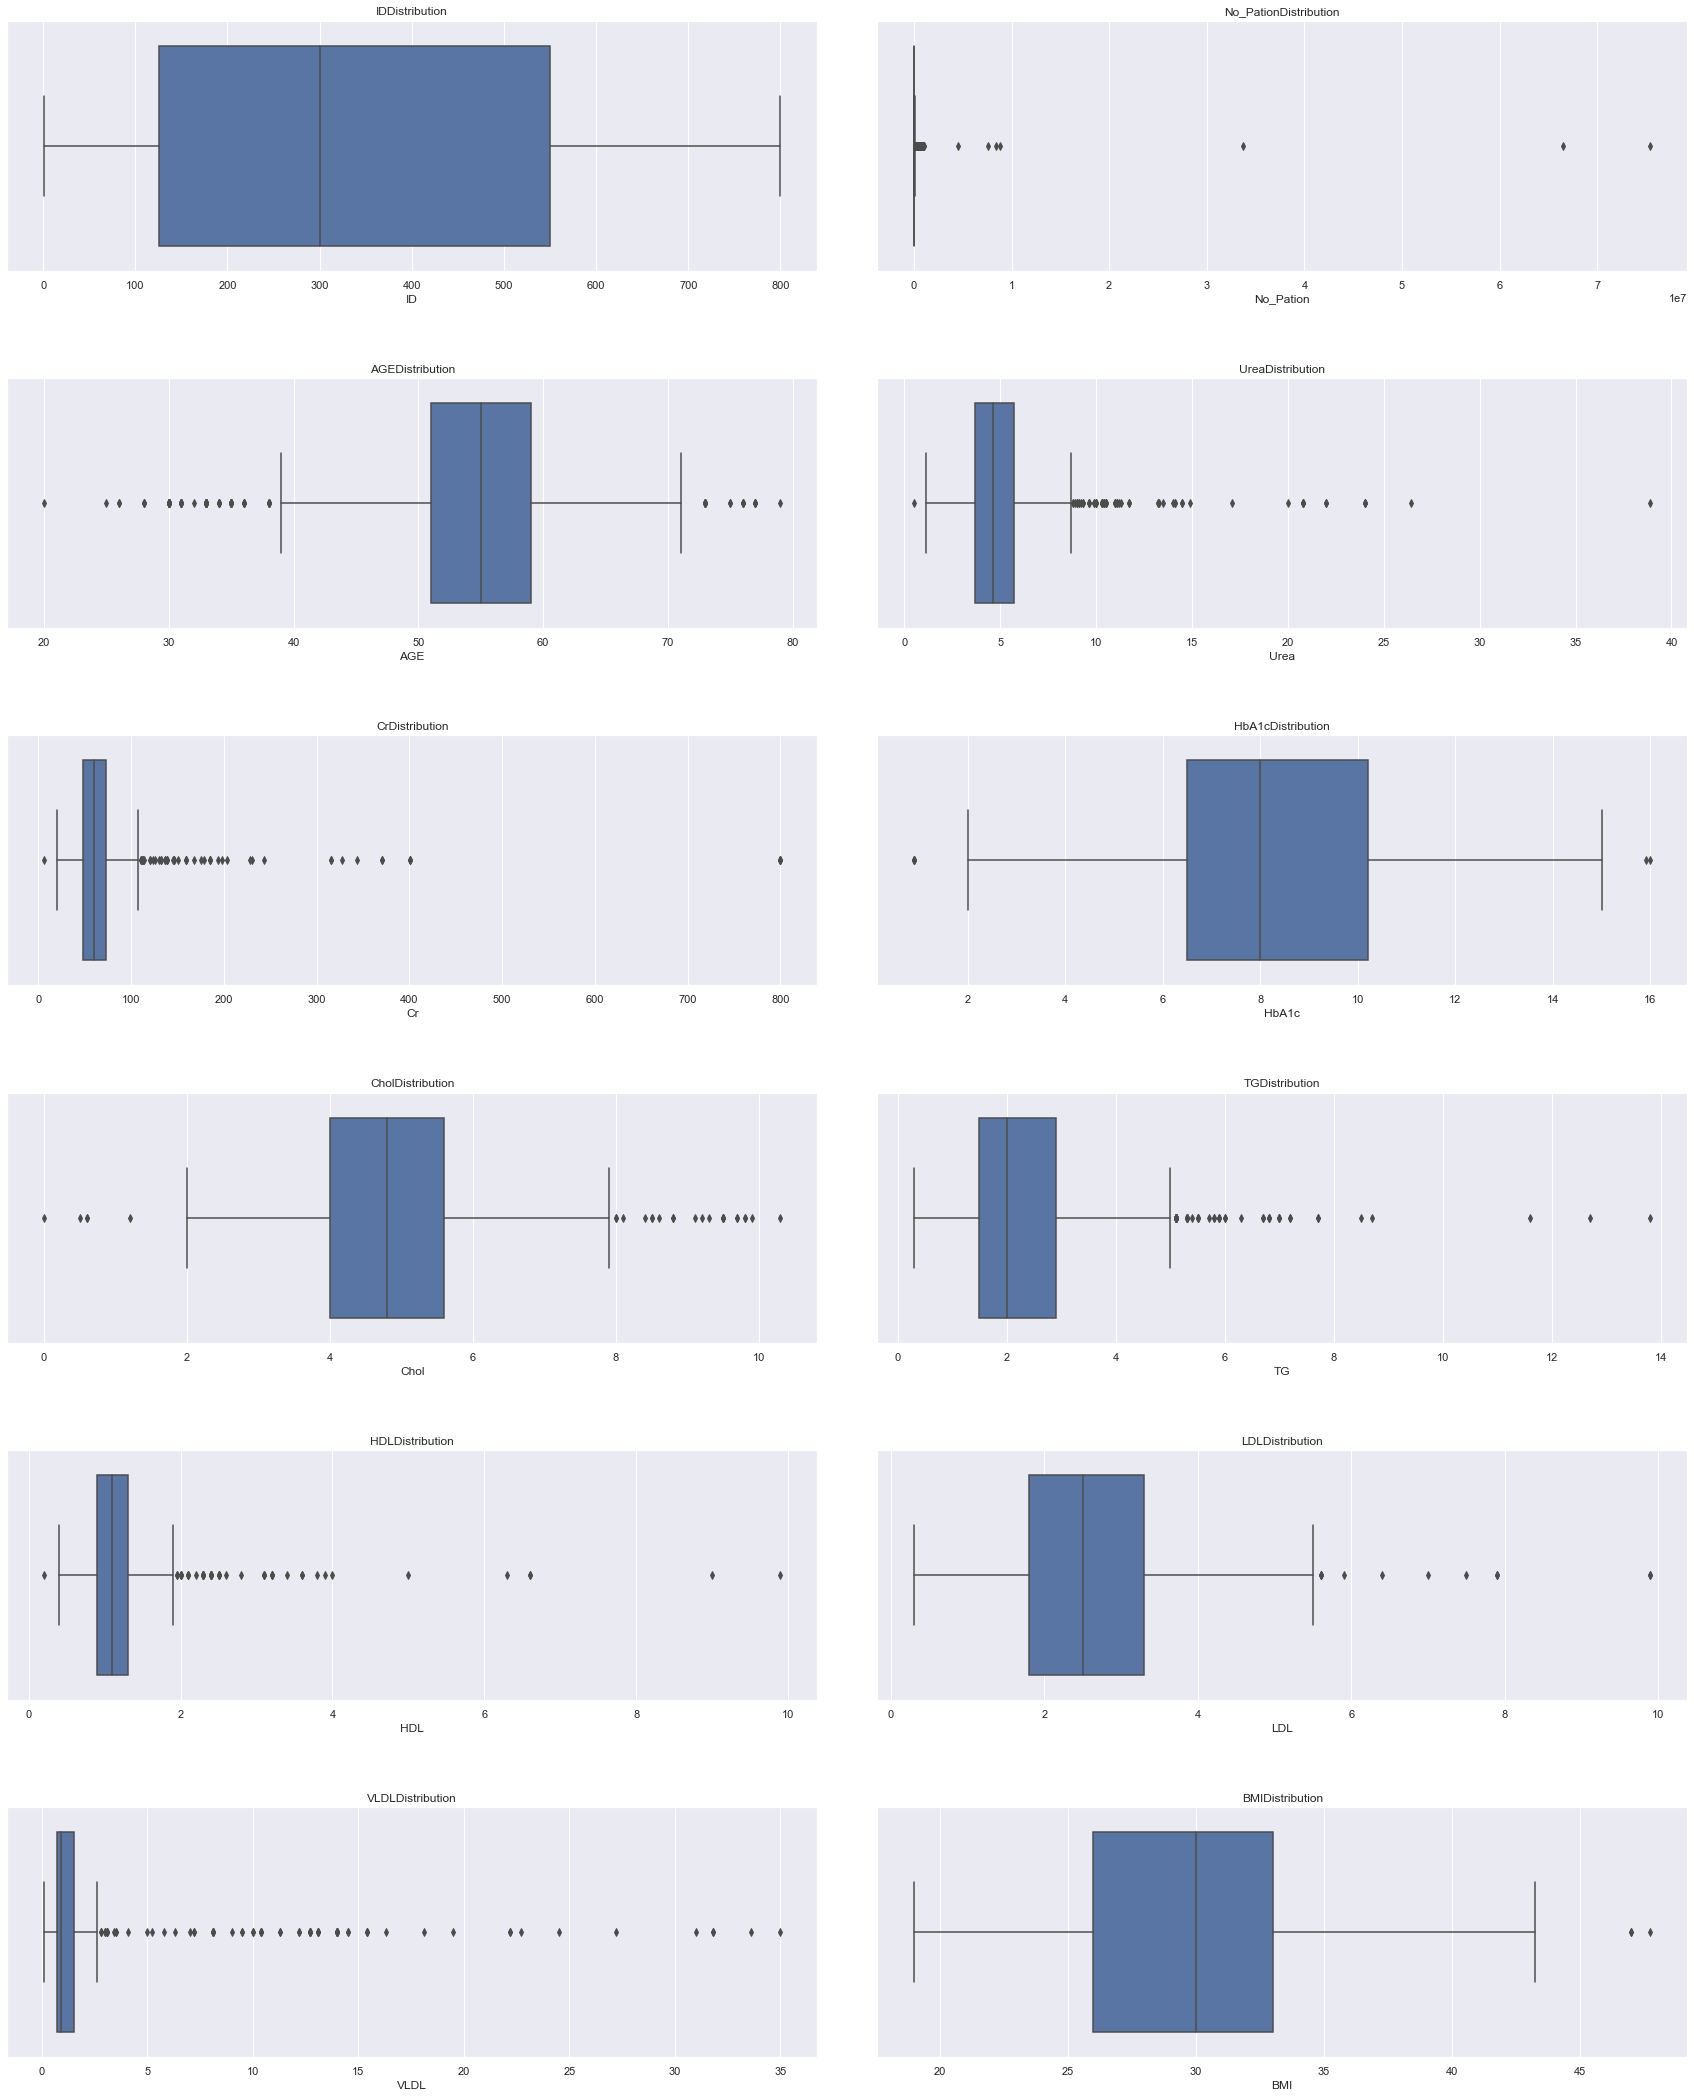

In [35]:
numeric_cols = data.select_dtypes(exclude='object').columns.to_list()
fig = plt.figure(figsize=(25, 50))
for i, col in enumerate(numeric_cols):
    plt.subplot(10, 2, i+1)
    sns.boxplot(x=col, data=data)
    plt.title(col + 'Distribution')
fig.tight_layout(pad=5)

- As we see here most of the columns have outliers so we need to remove them

## Count Plot

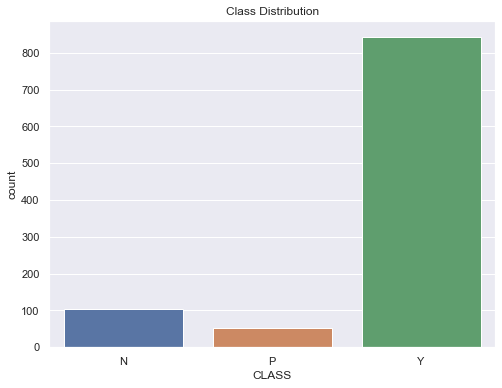

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CLASS', data=data)
plt.title('Class Distribution')
plt.show()

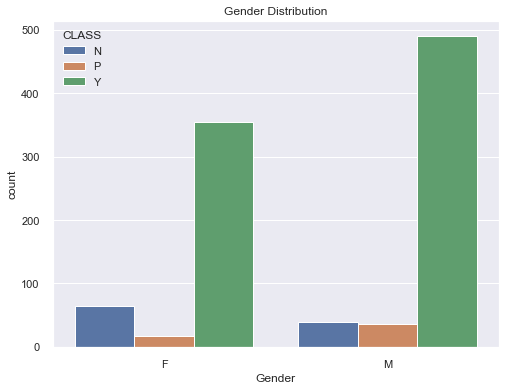

In [181]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, hue='CLASS')
plt.title('Gender Distribution')
plt.show()

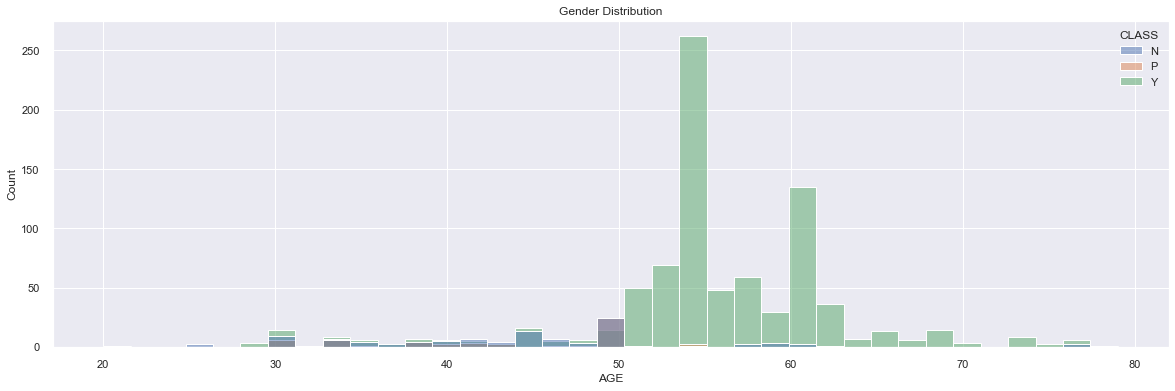

In [189]:
plt.figure(figsize=(20, 6))
sns.histplot(x='AGE', data=data, hue='CLASS')
plt.title('Gender Distribution')
plt.show()

- Patients from `50` to `65` years old may have higher diabetes risk.
- Younger people are less prone to be diagnosed with diabetes disease.

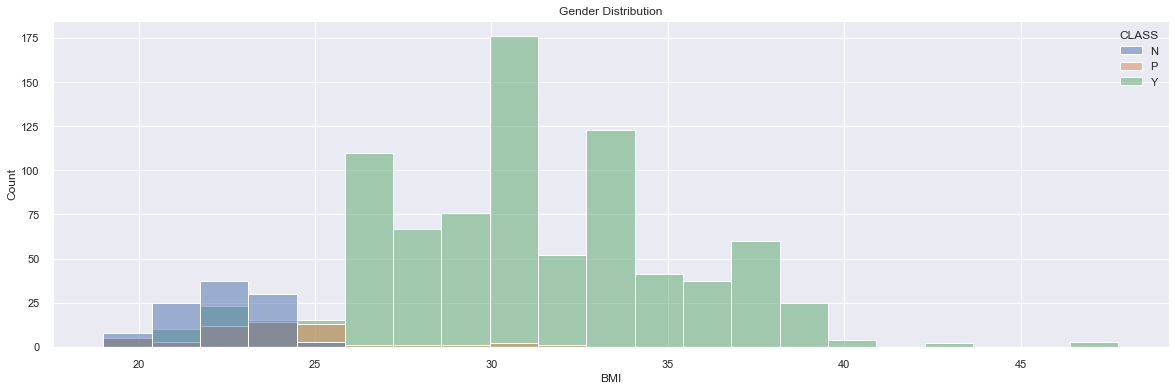

In [190]:
plt.figure(figsize=(20, 6))
sns.histplot(x='BMI', data=data, hue='CLASS')
plt.title('Gender Distribution')
plt.show()

- Patients with `BMI` from  `26` to `40` years old may have higher diabetes risk.

## Pie Plot

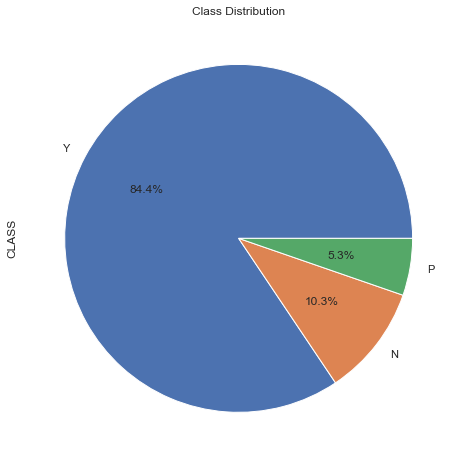

In [38]:
plt.figure(figsize=(8, 8))
data['CLASS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

- As we see most of the patients are diabetic

# Applying Label Encoder for Non Numerical data

In [210]:
LabelEncoder=LabelEncoder()
data_label=["Gender","CLASS"]
for label in data_label :
    LabelEncoder.fit(data[label])
    data[label]=LabelEncoder.transform(data[label])

In [211]:
data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
996,671,876534,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,669,87654,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,99,24004,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2


## Detecting Outliers and Remove it

In [212]:
def detect_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

filtered_data = data[
    ~data.index.isin(detect_outliers_iqr(data,"AGE").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"Urea").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"Cr").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"HbA1c").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"Chol").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"TG").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"HDL").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"LDL").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"VLDL").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"BMI").index) 
]


filtered_data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
5,634,34224,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
6,721,34225,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
7,421,34227,1,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,0
13,132,34234,0,45,4.6,54,5.1,4.2,1.7,1.2,2.2,0.8,23.0,0
14,402,34235,0,50,3.5,39,4.0,4.0,1.5,1.2,2.2,0.7,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,193,454316,1,62,6.3,82,6.7,5.3,2.0,1.0,3.5,0.9,30.1,2
990,194,454316,0,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,2
991,195,4543,0,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,2
992,196,454316,1,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,2


# normalize Data

In [213]:
normalizer=StandardScaler()

for col in filtered_data.columns.drop(['Gender', 'CLASS']):
    filtered_data[col] = normalizer.fit_transform(filtered_data[col].values.reshape(-1, 1))


In [214]:
filtered_data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
5,1.266313,-0.100057,0,-1.753516,-1.539627,-1.980409,-1.741589,-1.692161,-1.134289,-0.354182,-1.078347,-1.323109,-1.861247,0
6,1.633658,-0.100054,0,-0.859644,-1.745470,-0.468729,-1.741589,-1.062880,-0.832887,-0.670907,-0.472215,-0.880333,-1.206898,0
7,0.366953,-0.100048,1,-1.217193,0.107115,-0.643153,-1.741589,-1.692161,-1.335224,-0.670907,-0.977325,-1.323109,-1.206898,0
13,-0.853307,-0.100028,0,-1.753516,0.038501,-0.236163,-1.306055,-0.523496,-0.431018,0.279268,-0.371193,-0.437558,-1.425014,0
14,0.286728,-0.100025,0,-0.859644,-0.716256,-1.108286,-1.741589,-0.703291,-0.631953,0.279268,-0.371193,-0.658946,-1.206898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,-0.595743,1.096049,1,1.285649,1.204943,1.391801,-0.672550,0.465374,-0.129616,-0.354182,0.942093,-0.216171,0.123610,2
990,-0.591521,1.096049,0,0.391777,-0.304570,0.694102,0.356894,0.465374,1.176459,-0.354182,-1.179369,0.669379,-0.116318,2
991,-0.587298,-0.184566,0,0.034228,-0.304570,-1.398994,2.178219,0.555271,-0.531485,1.546169,0.538005,-0.658946,0.756146,2
992,-0.583076,1.096049,1,0.034228,-0.990713,-1.108286,0.040142,0.195682,0.372720,2.496344,0.335961,-0.658946,-0.552550,2


# Correlation Matrix

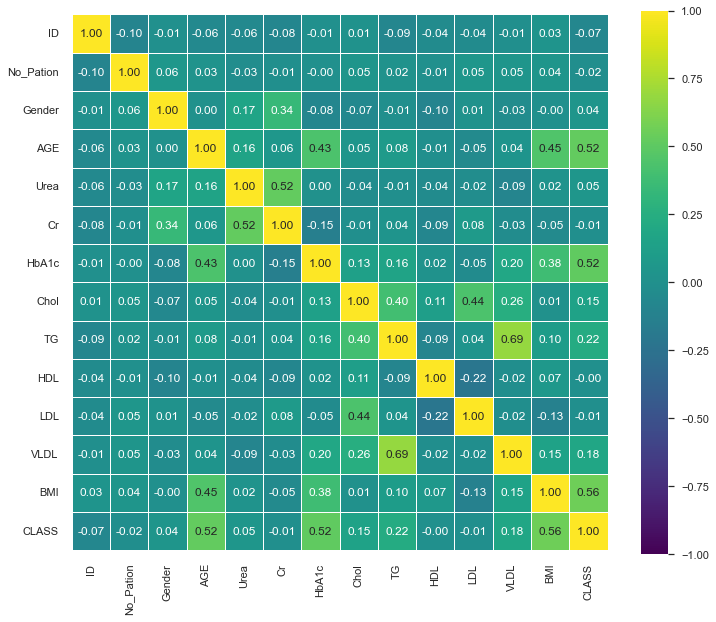

In [215]:
correlation_matrix = filtered_data.corr()
plt.figure(figsize = (12,10))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

- As we see the columns `AGE`, `HbA1c`, `BMI`  are highly correlated with the `CLASS`

In [216]:
# drop unnecessary columns
filtered_data.drop(['ID', 'No_Pation'], axis=1, inplace=True)

# Models

In [217]:
x_data = filtered_data.drop('CLASS', axis=1)
y_data = filtered_data['CLASS']

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

from yellowbrick.classifier import ConfusionMatrix

In [219]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=30
    )

In [220]:
x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
947,1,0.928100,-0.853484,0.054545,-0.316204,-1.152777,-1.134289,0.595994,-1.078347,-0.658946,0.101798
574,1,2.179521,2.234157,2.380207,-0.514174,-1.871956,-1.134289,-0.987632,-1.179369,-1.101721,0.021095
322,1,0.928100,-0.441799,-0.526870,-0.791332,-0.703291,0.171786,-0.354182,-0.573237,0.005217,0.319914
569,1,0.034228,0.587415,-0.119879,-0.197422,0.105785,-0.029149,-0.037457,-0.068127,-0.216171,-0.334434
653,1,-0.680870,-0.579027,-0.003596,0.238112,1.274450,-0.631953,1.546169,-0.876303,1.112155,1.192379
...,...,...,...,...,...,...,...,...,...,...,...
641,0,-0.144547,1.685243,0.810385,-0.316204,0.105785,0.674122,-0.987632,0.436983,0.447992,0.319914
254,0,0.034228,-1.265170,-0.352446,-0.157828,-0.163907,-0.431018,-0.354182,0.335961,-0.437558,0.101798
247,0,0.928100,-1.745470,-0.759437,-0.632956,2.173423,0.071318,-0.987632,-0.371193,0.226604,-0.552550
736,0,0.034228,0.107115,-1.398994,0.594459,0.285580,2.382066,-1.621082,0.133917,2.219092,0.974263


## Decision Tree

In [221]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [222]:
decision_tree_model.score(x_test, y_test)

0.9779411764705882

In [223]:
df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': decision_tree_model.feature_importances_
})

df.sort_values(by='importance', ascending=False)


,feature,importance
10,BMI,0.443747
4,HbA1c,0.258595
6,TG,0.094264
5,Chol,0.077492
1,AGE,0.063156
2,Urea,0.062746
0,Gender,0.000000
3,Cr,0.000000
7,HDL,0.000000
8,LDL,0.000000


Text(0.5, 1.0, 'Feature Importance')

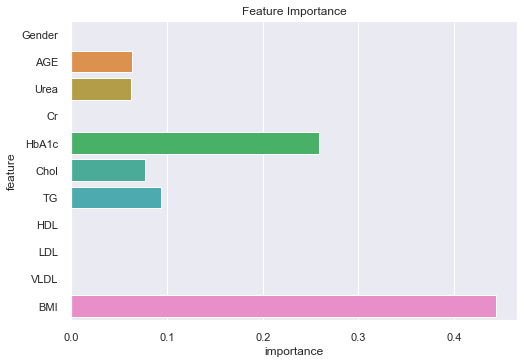

In [224]:
sns.barplot(x='importance', y='feature', data=df)
plt.title('Feature Importance')

- here are the weights of each feature in the model
- BMI and HbA1c are the most important features
- the gender isn't important

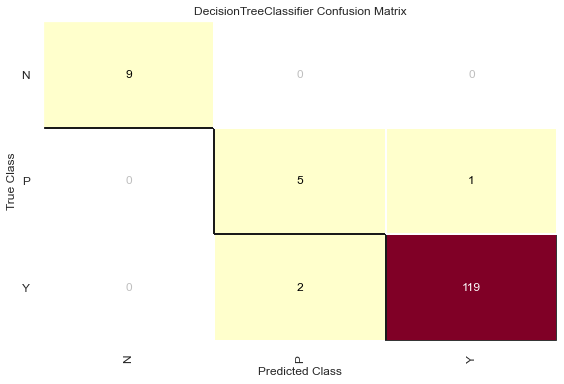

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [225]:
iris_cm = ConfusionMatrix(
    decision_tree_model, classes=['N', 'P', 'Y'],
    label_encoder={0: 'Y', 1: 'P', 2: 'N'}
)

iris_cm.fit(x_train, y_train)
iris_cm.score(x_test, y_test)
iris_cm.show()

In [226]:
print(classification_report(y_test, decision_tree_model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.71      0.83      0.77         6
           2       0.99      0.98      0.99       121

    accuracy                           0.98       136
   macro avg       0.90      0.94      0.92       136
weighted avg       0.98      0.98      0.98       136



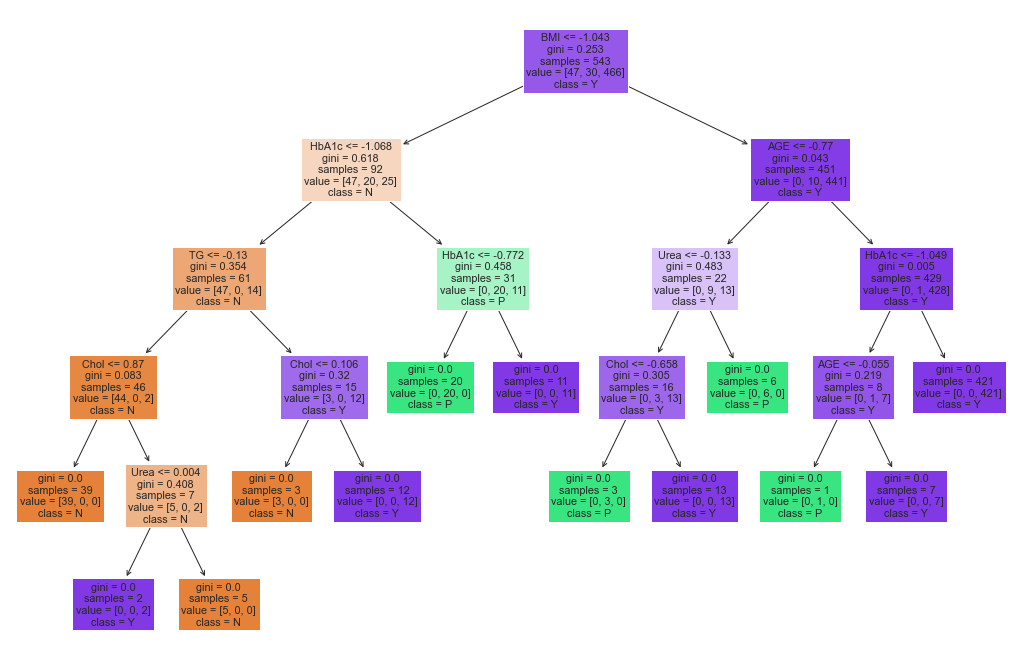

In [227]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(18, 12))
plot_tree(decision_tree_model, feature_names=x_test.columns.to_list(), class_names=['N', 'P', 'Y'], filled=True)
plt.show()

## KNN

In [228]:
knn_scores = []
for i in range(5,20):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    knn_scores.append((i, sum(knn.predict(x_test)== y_test)))

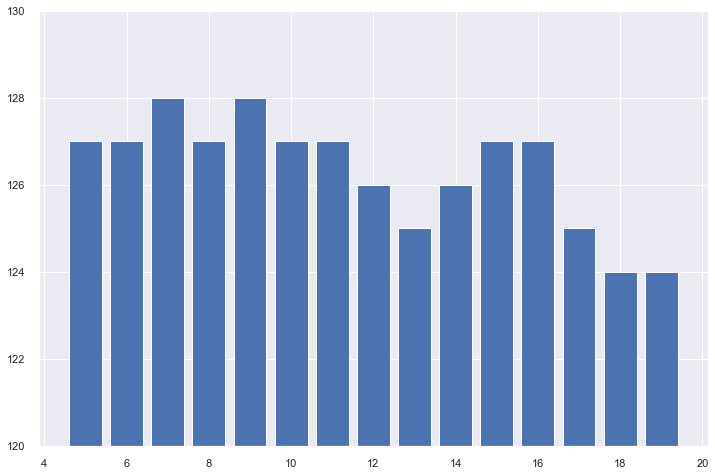

In [229]:
plt.figure(figsize=(12, 8))
plt.bar([i[0] for i in knn_scores ], [i[1] for i in knn_scores])

plt.ylim(120, 130)
plt.show()

In [230]:
knn = KNeighborsClassifier(9, weights='distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [231]:
knn.score(x_test, y_test)

0.9558823529411765

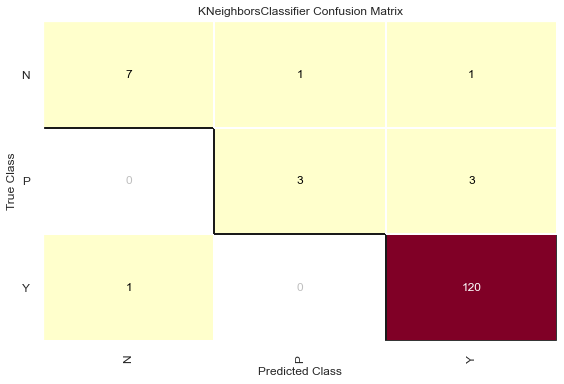

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [232]:
iris_cm = ConfusionMatrix(
    knn, classes=['N', 'P', 'Y'],
    label_encoder={0: 'Y', 1: 'P', 2: 'N'}
)

iris_cm.fit(x_train, y_train)
iris_cm.score(x_test, y_test)
iris_cm.show()

In [233]:
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.75      0.50      0.60         6
           2       0.97      0.99      0.98       121

    accuracy                           0.96       136
   macro avg       0.86      0.76      0.80       136
weighted avg       0.95      0.96      0.95       136



## Random Forest

In [234]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [235]:
RF.score(x_test, y_test)


0.9926470588235294

In [236]:
df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': RF.feature_importances_
})

df.sort_values(by='importance', ascending=False)


,feature,importance
4,HbA1c,0.298687
10,BMI,0.260167
1,AGE,0.152409
6,TG,0.082356
5,Chol,0.055803
8,LDL,0.039125
9,VLDL,0.037574
2,Urea,0.024572
3,Cr,0.023692
7,HDL,0.019687


Text(0.5, 1.0, 'Feature Importance')

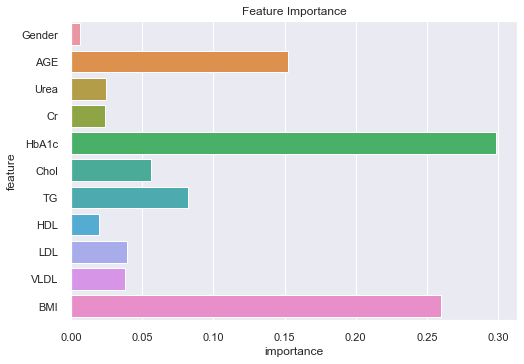

In [238]:
sns.barplot(x='importance', y='feature', data=df)
plt.title('Feature Importance')

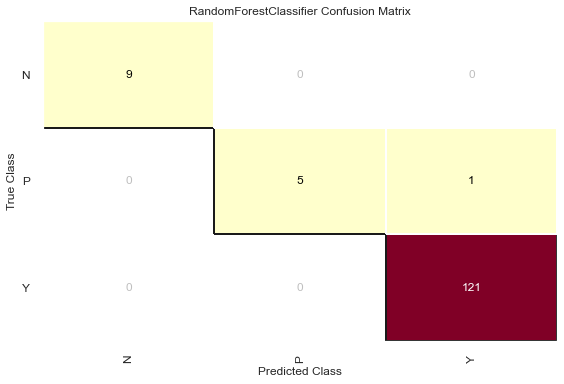

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [239]:
iris_cm = ConfusionMatrix(
    RF, classes=['N', 'P', 'Y'],
    label_encoder={0: 'Y', 1: 'P', 2: 'N'}
)

iris_cm.fit(x_train, y_train)
iris_cm.score(x_test, y_test)
iris_cm.show()

In [240]:
print(classification_report(y_test, RF.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.83      0.91         6
           2       0.99      1.00      1.00       121

    accuracy                           0.99       136
   macro avg       1.00      0.94      0.97       136
weighted avg       0.99      0.99      0.99       136



## SVM

In [241]:
svc = SVC(random_state=42)
svc.fit(x_train, y_train)

SVC(random_state=42)

In [242]:
svc.score(x_test, y_test)

0.9485294117647058

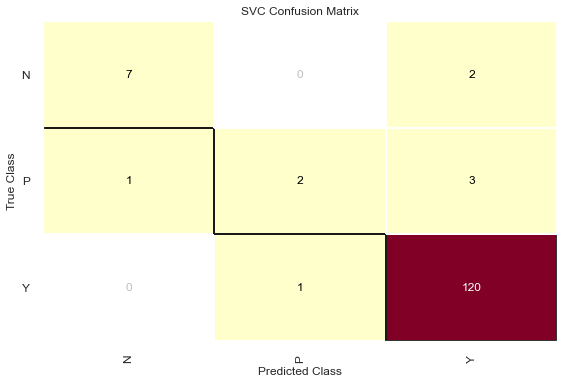

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [243]:
iris_cm = ConfusionMatrix(
    svc, classes=['N', 'P', 'Y'],
    label_encoder={0: 'Y', 1: 'P', 2: 'N'}
)

iris_cm.fit(x_train, y_train)
iris_cm.score(x_test, y_test)
iris_cm.show()

In [244]:
print(classification_report(y_test, svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.67      0.33      0.44         6
           2       0.96      0.99      0.98       121

    accuracy                           0.95       136
   macro avg       0.83      0.70      0.75       136
weighted avg       0.94      0.95      0.94       136



## Naive Base

In [245]:
normalized_data = filtered_data.copy(deep=True)

In [246]:
minmax_scaler = MinMaxScaler()
for col in filtered_data.columns.drop('CLASS'):
    normalized_data[col] = minmax_scaler.fit_transform(normalized_data[col].values.reshape(-1, 1))


In [247]:
x_train_, x_test_, y_train_, y_test_ = train_test_split(
    normalized_data.drop('CLASS', axis=1), normalized_data['CLASS'], test_size=0.2, random_state=30
    )

In [248]:
naive_base = CategoricalNB()
naive_base.fit(x_train_, y_train_)

CategoricalNB()

In [249]:
naive_base.score(x_test_, y_test_)

0.8823529411764706

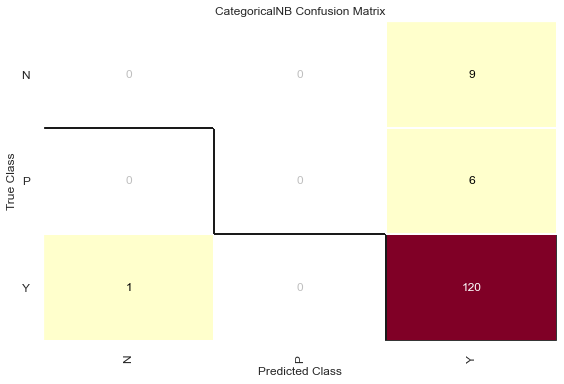

<AxesSubplot:title={'center':'CategoricalNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [250]:
iris_cm = ConfusionMatrix(
    naive_base, classes=['N', 'P', 'Y'],
    label_encoder={0: 'Y', 1: 'P', 2: 'N'}
)

iris_cm.fit(x_train_, y_train_)
iris_cm.score(x_test_, y_test_)
iris_cm.show()

In [251]:
print(classification_report(y_test_, naive_base.predict(x_test_)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         6
           2       0.89      0.99      0.94       121

    accuracy                           0.88       136
   macro avg       0.30      0.33      0.31       136
weighted avg       0.79      0.88      0.83       136



In [252]:
models_accuracy = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Naive Base'],
    'Train Accuracy': [
        decision_tree_model.score(x_train ,y_train),
        RF.score(x_train ,y_train),
        knn.score(x_train ,y_train),
        svc.score(x_train ,y_train),
        naive_base.score(x_train_ ,y_train_)
        ], 
    'Test Accuracy': [
        decision_tree_model.score(x_test ,y_test),
        RF.score(x_test ,y_test),
        knn.score(x_test ,y_test),
        svc.score(x_test ,y_test),
        naive_base.score(x_test_ ,y_test_)
        ]
})


In [253]:
models_accuracy

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,1.000000,0.977941
1,Random Forest,1.000000,0.992647
2,KNN,1.000000,0.955882
3,SVM,0.976059,0.948529
4,Naive Base,0.856354,0.882353


(0.8, 1.0)

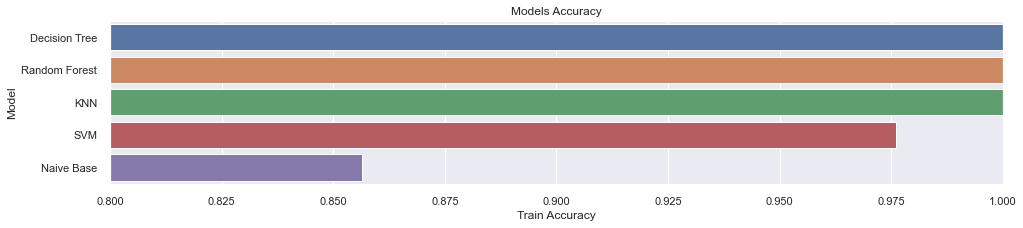

In [264]:
plt.figure(figsize=(16, 3))
sns.barplot(x='Train Accuracy', y='Model', data=models_accuracy)
plt.title('Models Accuracy')
plt.xlim(0.8, 1)


(0.8, 1.0)

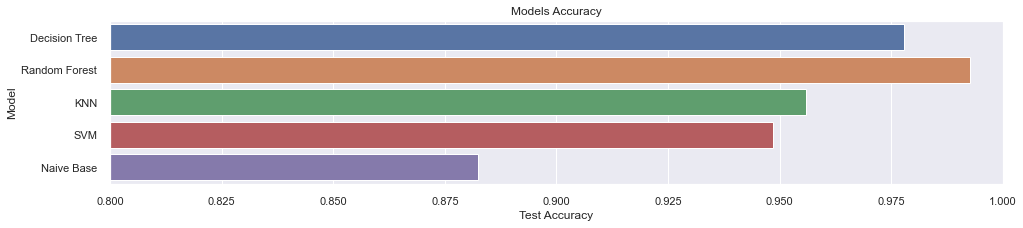

In [265]:
plt.figure(figsize=(16, 3))
sns.barplot(x='Test Accuracy', y='Model', data=models_accuracy)
plt.title('Models Accuracy')
plt.xlim(0.8, 1)
